# Trabajo Práctico Integrador de Machine Learning
## Análisis de Datos y Modelo Predictivo basado en Regresión
### Autor: Lisandro Rios

### Introducción
Este trabajo práctico tiene como objetivo desarrollar un análisis de datos y la creación de un modelo predictivo basado en técnicas de regresión. El conjunto de datos elegido es Criptomonedas, Bolsa de Valores y Inflación que se haseleccionado por el cresiente inpacto en la vida diaria y la posibilidad de tarabajar con siencia de datos.

## A continuación, una breve introduccion al tema de las criptomonedas
1. **Conceptos básicos de criptomonedas:**
   - Criptomonedas son monedas digitales creadas con tecnología blockchain.
   - Blockchain es un sistema de registro descentralizado que organiza datos en bloques y los protege con criptografía.
   - Se utilizan para transacciones entre pares, finanzas descentralizadas, almacenamiento, juegos y reservas de valor.

2. **Tipos de criptomonedas:**
   - Criptomonedas nativas de la tecnología blockchain de "capa uno" incluyen Bitcoin, utilizado como almacén de valor.
   - Altcoins, como Ethereum, tienen blockchains nativas similares y ofrecen smart contracts y aplicaciones descentralizadas.
   - Blockchains de "capa dos", como Polygon, mejoran la escalabilidad y velocidad de transacción.
   - Stablecoins están vinculadas a monedas reales como el dólar estadounidense.
   - Memecoins, como Dogecoin, son populares pero pueden carecer de un propósito definido.

3. **Riesgos y consideraciones:**
   - Las criptomonedas varían en riesgo, con las de "capa uno" y mayor capitalización consideradas menos riesgosas.
   - Memecoins pueden ser riesgosas y susceptibles a esquemas de estafa o "pump and dump".
   - El mercado de criptomonedas es especulativo y arriesgado, con más de la mitad de las criptomonedas fracasando desde 2014.


## A continuación, una breve introducción al tema de la bolsa de valores y las acciones en las empresas
1. **Conceptos básicos de la bolsa de valores:**
   - La bolsa de valores es un mercado organizado donde se compran y venden acciones de empresas públicas.
   - Las acciones representan una fracción del capital social de una empresa y otorgan derechos de propiedad sobre la misma.
   - La bolsa permite la transferencia de acciones entre inversores y proporciona liquidez al mercado financiero.

2. **Tipos de acciones:**
   - **Acciones ordinarias:** otorgan derechos de voto en las juntas de accionistas y dividendos variables según las ganancias de la empresa.
   - **Acciones preferentes:** no suelen otorgar derechos de voto, pero ofrecen dividendos fijos y tienen prioridad sobre las acciones ordinarias en el pago de dividendos y liquidación.
   - **Acciones de crecimiento:** pertenecen a empresas con alto potencial de crecimiento, que suelen reinvertir sus ganancias para expandirse en lugar de pagar dividendos.
   - **Acciones de valor:** pertenecen a empresas bien establecidas con precios de acciones considerados bajos en relación con sus fundamentales financieros.
   - **Acciones cíclicas y defensivas:** las cíclicas están ligadas al ciclo económico (como las del sector automotriz), mientras que las defensivas son menos sensibles a los cambios económicos (como las de servicios públicos).

3. **Riesgos y consideraciones:**
   - **Volatilidad del mercado:** los precios de las acciones pueden fluctuar considerablemente en función de factores económicos, políticos y de la empresa.
   - **Riesgo de empresa:** factores específicos de una empresa, como mala gestión o problemas financieros, pueden afectar negativamente el valor de sus acciones.
   - **Diversificación:** invertir en una variedad de acciones puede mitigar el riesgo, ya que disminuye la dependencia de una sola inversión.
   - **Rendimiento a largo plazo:** históricamente, el mercado de valores ha ofrecido rendimientos positivos a largo plazo, aunque las inversiones en acciones pueden ser más arriesgadas a corto plazo.
   - **Evaluación fundamental y técnica:** los inversores utilizan análisis fundamental (examinando los estados financieros y perspectivas de la empresa) y análisis técnico (observando los movimientos históricos de los precios) para tomar decisiones informadas.


## A continuación, una breve introducción al tema del el cambio del dólar blue a peso argentino

1. **Conceptos básicos del dólar blue:**
   - El dólar blue es una cotización del dólar estadounidense en el mercado informal o paralelo en Argentina.
   - Surge como resultado de restricciones cambiarias impuestas por el gobierno, que limitan la cantidad de dólares que se pueden comprar en el mercado oficial.
   - El tipo de cambio del dólar blue suele ser más alto que el oficial, reflejando la oferta y demanda en el mercado informal.

2. **Factores que influyen en el tipo de cambio del dólar blue:**
   - **Inflación:** La alta inflación en Argentina devalúa el peso, incrementando la demanda de dólares como refugio de valor.
   - **Política monetaria:** Las restricciones cambiarias y la emisión de dinero por parte del gobierno afectan la disponibilidad y el valor del dólar blue.
   - **Expectativas económicas:** La percepción de estabilidad económica y política influye en la demanda de dólares, afectando su cotización en el mercado paralelo.
   - **Fuga de capitales:** La salida de capitales del país debido a la falta de confianza en la economía argentina puede aumentar la demanda de dólares blue.

4. **Riesgos y consideraciones:**
   - **Volatilidad:** El tipo de cambio del dólar blue es altamente volátil y puede cambiar bruscamente en respuesta a noticias económicas o políticas.
   - **Legalidad:** Operar en el mercado del dólar blue puede estar asociado a riesgos legales, ya que se trata de un mercado informal no regulado.
   - **Diferencial cambiario:** La brecha significativa entre el dólar oficial y el dólar blue puede generar distorsiones en la economía, afectando tanto a consumidores como a empresas.
   - **Políticas de estabilización:** Las políticas gubernamentales para controlar el tipo de cambio y la inflación, como la implementación de cepos cambiarios, tienen impactos profundos en el mercado del dólar blue y en la economía en general.

A continuación procedere a explicar el funcionamiento del codigo

### Importamos las librerias necesarias

In [78]:
# Importar las librerías necesarias
import os
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from itertools import cycle

### Definición de funciones
Primero, voy a definir las funciones que se van a utilizar a lo largo del programa. 

El objetivo principal del código era que scrapear una página qué va actualizando constantemente el valor de la criptomoneda elegida, debido a que la tecnología scraping no se adapta a una página que está en constante actualización ( tiempo real ), se decidio por descargar los datos en formato csv de la pagina "investing.com".
 - Formato de busqueda de la criptomoneda a utilizar: https://es.investing.com/crypto/{cripto}/historical-data
 - Remplazar la palabra {cripto} por la criptomoneda deseada.

El principal problema de desarrollar este código puede transformar los datos de la tabla la siguiente función reorganiza el archivo csv para que pueda ser utilizado de manera efectiva.
Mas adelante en el codigo se utilizo scraping para la recolecion de datos de las acciones de las companias y los valores del dolar blue a argentino.

In [79]:
# Función para convertir el formato de fecha
def convert_date(date):
    return datetime.strptime(date, "%d.%m.%Y").strftime("%Y-%m-%d %H:%M:%S")

# Función para leer el archivo CSV de entrada y escribir en el archivo CSV de salida
def transform_csv(input_file, output_file, cripto):
    # Obtener la ruta del directorio para el archivo de salida
    output_dir = os.path.dirname(output_file)
    # Crear el directorio si no existe
    os.makedirs(output_dir, exist_ok=True)
    
    with open(input_file, mode='r', encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)  # Saltar la primera fila (encabezados)
        data = list(csv_reader)
        data.reverse()  # Invertir el orden de las filas
        with open(output_file, mode='w', encoding='utf-8', newline='') as output_csv:
            csv_writer = csv.writer(output_csv)
            # Escribir los encabezados para el nuevo formato
            csv_writer.writerow(["SNo", "Name", "Symbol", "Date", "High", "Low", "Open", "Close", "Volume", "Marketcap"])
            # Iterar sobre las filas del archivo de entrada
            for idx, row in enumerate(data, start=1):
                fecha = convert_date(row[0])  # Convertir la fecha al nuevo formato
                # Reemplazar las comas y convertir números al formato adecuado
                ultimo = float(row[1].replace('.', '').replace(',', '.'))
                apertura = float(row[2].replace('.', '').replace(',', '.'))
                maximo = float(row[3].replace('.', '').replace(',', '.'))
                minimo = float(row[4].replace('.', '').replace(',', '.'))
                vol = row[5].replace('K', '000').replace('.', '').replace(',', '.')
                var = row[6].replace('%', '').replace(',', '.')
                # Escribir la fila en el nuevo formato
                csv_writer.writerow([idx, cripto, "", fecha, maximo, minimo, apertura, ultimo, vol, 0.0])
    print("Transformación completada.")

Este cambio se da por la información dada en la columnas originales:
Cada título se refiere a una columna típica que podrías encontrar en una tabla de datos financieros, específicamente en el contexto de cotizaciones de activos financieros como acciones o criptomonedas. Aquí te explico qué representa cada uno:

1. **"Fecha":**
   - Esta columna muestra la fecha en la que se registraron los datos de cotización correspondientes. Cada fila de la tabla representará un conjunto de datos para una fecha específica.

2. **"Último":**
   - Se refiere al último precio al que se negoció el activo financiero en el mercado en la fecha indicada. Es el precio más reciente registrado para ese día de negociación.

3. **"Apertura":**
   - Indica el precio de apertura del activo financiero al inicio de la sesión de negociación en esa fecha particular. Es el primer precio registrado cuando se abre el mercado.

4. **"Máximo":**
   - Es el precio más alto al que llegó el activo financiero durante la sesión de negociación en la fecha dada. Representa el punto máximo alcanzado por el precio durante ese día.

5. **"Mínimo":**
   - Representa el precio más bajo al que descendió el activo financiero durante la sesión de negociación en la fecha indicada. Es el punto mínimo registrado por el precio durante ese día.

6. **"Vol.":**
   - Abreviatura de volumen, indica la cantidad total de activos financieros (acciones, criptomonedas, etc.) que se negociaron durante la sesión de negociación en esa fecha. Puede estar expresado en unidades o en términos de dinero.

7. **"% var.":**
   - Esta columna muestra la variación porcentual del precio de cierre (último precio registrado) en comparación con el precio de cierre del día anterior. Es una medida del cambio porcentual en el precio del activo desde el cierre del día anterior hasta el cierre del día actual.


Se cambio por la siguiente para mayor comodidad a la hora de analizar el csv:
1. **"SNo":**
   - Este probablemente sea un número de serie o un identificador único para cada registro en la tabla de datos. Es común en bases de datos para identificar de manera única cada entrada.

2. **"Name":**
   - Se refiere al nombre completo de la criptomoneda. Por ejemplo, Bitcoin, Ethereum, etc.

3. **"Symbol":**
   - Es el símbolo o abreviatura comúnmente utilizada para representar la criptomoneda. Por ejemplo, BTC para Bitcoin, ETH para Ethereum.

4. **"Date":**
   - Indica la fecha en la que se registraron los datos de cotización correspondientes. Cada fila de la tabla representará un conjunto de datos para una fecha específica.

5. **"High":**
   - Representa el precio más alto alcanzado por la criptomoneda durante el día o período de tiempo especificado.

6. **"Low":**
   - Indica el precio más bajo al que descendió la criptomoneda durante el día o período de tiempo especificado.

7. **"Open":**
   - Es el precio de apertura de la criptomoneda al inicio del período de tiempo especificado (por lo general, el día).

8. **"Close":**
   - Se refiere al precio de cierre de la criptomoneda al final del período de tiempo especificado (por lo general, el día). Es el último precio registrado antes del cierre del mercado.

9. **"Volume":**
   - Indica la cantidad total de la criptomoneda que se negoció durante el período de tiempo especificado. Puede estar expresado en unidades de la criptomoneda o en términos de su valor en una moneda fiat (por ejemplo, USD).

10. **"Marketcap":**
    - Es la capitalización de mercado de la criptomoneda en ese momento específico. Representa el valor total de todas las unidades de la criptomoneda en circulación multiplicado por el precio actual de mercado.


Sin contar el cambio de formato de fecha y el orden de las filas (estan invertidas) ya que es el que se utiliza para el grafico en este caso.

Las columnas mas inportantes del progama son "Date" y "prediction" ya que es indispensable para el objetivo de predecir el valor del objeto a analizar.

In [80]:
# Función para cargar y preprocesar los datos
def load_and_preprocess_data(output_file, projection_Table):
    # Cargar los datos
    Table = pd.read_csv(output_file)
    # Asegúrate de que la columna 'Date' sea del tipo datetime
    Table['Date'] = pd.to_datetime(Table['Date'])
    # Creación de una nueva columna con el nombre 'Prediction'
    Table['Prediction'] = Table[['Close']].shift(-int(projection_Table))
    return Table

Nesecitamos crear el conjunto dependiente e independiente

In [81]:
# Función para crear los conjuntos de datos independientes (X) y dependientes (y)
def create_datasets(Table, projection_Table):
    # Crear el conjunto de datos independiente (X)
    X_Table = np.array(Table[['Close']])
    X_Table = X_Table[:-int(projection_Table)]
    # Crear el conjunto de datos dependiente (y)
    y_Table = Table['Prediction'].values
    y_Table = y_Table[:-int(projection_Table)]
    return X_Table, y_Table

Al tener todo los datos listos es necesario entrenar al modelo no los datos que tenemos asi tenemos menor indice de error.

In [82]:
# Función para entrenar el modelo y hacer predicciones
def train_and_predict(X, y, projection_Table):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Calcular el puntaje R^2 del modelo
    score = model.score(X_train, y_train)
    X_forecast = X[-int(projection_Table):]
    predictions = model.predict(X_forecast)
    return predictions, score

Ya que queremos "predecir" el valor de dichas tematicas, opte por crear un DataFrame con las "predicciones futuras"  en relacio a los datos analizados.

In [83]:
# Función para crear un DataFrame de predicciones futuras
def create_future_dataframe(Table, pred_Table, projection_Table):
    # Calcula las fechas futuras
    future_dates = [Table['Date'].max() + timedelta(days=x) for x in range(1, int(projection_Table) + 1)]
    future_df = pd.DataFrame({'Date': future_dates, 'Prediction': pred_Table})
    return future_df


Como los datos relacionados con la economia se relacionan mas con graficos de tiempo se implemento la misma para todos los pedidos que puede realizar el usuario

In [84]:
# Función para visualizar los datos
def visualize_data(Table, future_df, cripto):
    # Concatenar el DataFrame original con el DataFrame de las predicciones
    Table = pd.concat([Table, future_df])
    # Visualización de los datos de la criptomoneda
    visualize_Table = cycle(['Apertura', 'Último', 'Máximo', 'Mínimo', 'Predicción'])
    fig = px.line(Table, x=Table.Date, y=[Table['Open'], Table['Close'], Table['High'], Table['Low'], Table['Prediction']],
                  labels={'Date': 'Fecha', 'Close': 'Precio'})
    fig.update_layout(title_text=cripto, font_size=15, font_color='black', legend_title_text='Parámetros')
    fig.for_each_trace(lambda t: t.update(name=next(visualize_Table)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

Esta función sirve para la validacion de los datos que desee analizar el usuario, esto se hizo para prevenir errores.

In [85]:
# Función para validar la entrada del usuario
def validate_input(prompt, type_func, condition_func=lambda x: True, error_message="Entrada inválida. Por favor, inténtelo de nuevo."):
    # Bucle infinito para seguir solicitando la entrada hasta que sea válida
    while True:
        try:
            # Solicita la entrada del usuario y la convierte usando type_func
            value = type_func(input(prompt))
            # Verifica si el valor cumple con la condición especificada en condition_func
            if condition_func(value):
                # Si cumple, retorna el valor
                return value
            else:
                # Si no cumple, muestra el mensaje de error
                print(error_message)
        except ValueError:
            # Si ocurre un error de conversión, muestra el mensaje de error
            print(error_message)


Para retornar los valores, como la Regresión lineal y las prediciones se decidio hacer una funcion que retorne en todos los casos.

In [86]:
# Función para retornar la conclución 
def conclusion(score, pred_Table):
            print("CONCLUSIÓN\n")
            print(f"Regresión lineal: {score} ({score*100}%)")
            print(f"Las predicciones del modelo de regresión lineal para los próximos días son {pred_Table}\n")

Una vez realizado esto se puede explicar el programa principal.


## Función main()

La función main() es la columna vertebral del codigo ya que es el lugar de donde se llaman a las funciónes y el usuario interactua. Ya que implementa un menú interactivo que permite al usuario seleccionar entre diferentes opciones relacionadas con el análisis de datos financieros.

El código proporcionado implementa un menú interactivo que permite al usuario seleccionar entre diferentes opciones relacionadas con el análisis de datos financieros. Vamos a desglosar cada sección del `main()` para entender cómo funciona:

### Menú y Selección de Opción

- **Descripción**: Aquí se muestra un menú con cuatro opciones numeradas. El usuario puede seleccionar una opción ingresando el número correspondiente.
- **Función `validate_input`**: Se utiliza para asegurar que la entrada del usuario sea un número entero válido dentro del rango de 1 a 4.

### Opción 1 - Criptomonedas

- **Descripción**: Esta sección se ejecuta si el usuario elige la opción 1 (Criptomonedas). Permite al usuario ingresar el nombre de la criptomoneda a analizar y realiza varias operaciones:
  - Verifica si existe un archivo CSV histórico para esa criptomoneda.
  - Valida y solicita al usuario cuántos días desea proyectar hacia el futuro.
  - Transforma los datos del archivo CSV histórico.
  - Realiza el procesamiento de datos, incluyendo la creación de conjuntos de datos, entrenamiento de modelos y predicciones.
  - Visualiza los datos y presenta una conclusión basada en las predicciones realizadas.

### Opción 2 - Mercado de Valores

- **Descripción**: Esta sección se ejecuta si el usuario elige la opción 2 (Mercado de Valores). Permite al usuario ingresar una URL personalizada de Investing.com que contenga datos históricos de valores.
  - Descarga los datos de la tabla HTML de la página web proporcionada.
  - Exporta los datos de la tabla a un archivo CSV temporal.
  - Valida y solicita al usuario cuántos días desea proyectar hacia el futuro.
  - Transforma los datos del archivo CSV temporal.
  - Realiza el procesamiento de datos, incluyendo la creación de conjuntos de datos, entrenamiento de modelos y predicciones.
  - Visualiza los datos y presenta una conclusión basada en las predicciones realizadas.

### Opción 3 - Valor del Dólar a Peso Argentino

- **Descripción**: Esta sección se ejecuta si el usuario elige la opción 3 (Valor del Dólar a Peso Argentino). Permite al usuario seleccionar entre dos tipos de dólar (Dólar Blue o Dólar oficial) y realiza las siguientes operaciones:
  - Selecciona la URL adecuada según la opción del usuario y realiza la solicitud HTTP para obtener los datos.
  - Extrae los datos de la tabla HTML correspondiente.
  - Exporta los datos de la tabla a un archivo CSV.
 

In [ ]:
# Función principal para ejecutar el análisis
def main():
    while True:
        #Motrar el menú
        print("Menú:")
        print("1. Criptomonedas")
        print("2. Mercado de valores (ingresar URL)")
        print("3. Valor dólar a peso argentino")
        print("4. Salir")

        #Controlar el error    
        option = validate_input("Seleccione una opción: ", int, lambda x: 1 <= x <= 4, "Opción inválida. Por favor, inténtelo de nuevo.")

        if option == 1:
            #El usuario ingresa la criptomoneda a analizar
            cripto = input("Ingrese el nombre de la criptomoneda que desea analizar: ")
            
            #Ruta a los archivos
            input_file = f"archive/Datos históricos del {cripto}.csv"
            output_file = f"archive/datosActualizados_{cripto}.csv"
            
            #Comprobar si existe en archive
            if not os.path.isfile(input_file):
                print("La criptomoneda especificada no se encontró. Por favor, inténtelo de nuevo.")
                continue
            
            #Validar los dias a proyectar
            projection_days = validate_input("Proyección a días en el futuro: ", int, lambda x: x > 0, "No se puede proyectar menos de 1 día en el futuro. Por favor, inténtelo de nuevo.")
            
            #Transformar el archivo CSV           
            transform_csv(input_file, output_file, cripto)
            
            # Procesamiento de datos y predicciones
            Table = load_and_preprocess_data(output_file, projection_days)
            X_Table, y_Table = create_datasets(Table, projection_days)
            pred_Table, score = train_and_predict(X_Table, y_Table, projection_days)
            future_df = create_future_dataframe(Table, pred_Table, projection_days)

            # Visualización y conclusión
            visualize_data(Table, future_df, cripto)
            conclusion(score, pred_Table)
        
        elif option == 2:
            cripto = "Bolsa de Valores"
            
            output_file = f"archive/datosActualizados_{cripto}.csv"
            archivo_csv = f"archive/archivo.csv"
            
            custom_url = input("Ingrese la URL personalizada (dicha url debe ser de esta pagina investing.com/equities/NOMBRE-caracterEspecial-historical-data): ")
            request = requests.get(custom_url)
            soup = BeautifulSoup(request.text) 
            
            # Extracción de datos de la tabla HTML
            tabla_html = soup.find_all("table")[1]
            datos_tabla = pd.read_html(str(tabla_html))[0]
            
            # Exportar los datos de la tabla a un archivo CSV
            datos_tabla.to_csv(archivo_csv, index=None, header=True)   
            # Leer los datos del archivo CSV
            datos_csv = pd.read_csv(archivo_csv)   
            print(datos_csv.head())    
            
            projection_days = validate_input("Proyección a días en el futuro: ", int, lambda x: x > 0, "No se puede proyectar menos de 1 día en el futuro. Por favor, inténtelo de nuevo.")
            
            #Transformar el archivo CSV           
            transform_csv(archivo_csv, output_file, cripto)
            
            # Procesamiento de datos y predicciones
            Table = load_and_preprocess_data(output_file, projection_days)
            X_Table, y_Table = create_datasets(Table, projection_days)
            pred_Table, score = train_and_predict(X_Table, y_Table, projection_days)
            future_df = create_future_dataframe(Table, pred_Table, projection_days)

            # Visualización y conclusión
            visualize_data(Table, future_df, "Mercado de Valores")
            conclusion(score, pred_Table)
        
        elif option == 3:
            # Definición de variables de archivo
            cripto = "Dolar a peso argentino"
            output_file = f"archive/datosActualizados_{cripto}.csv"
            archivo_csv = f"archive/archivo.csv"

            # Mostrar opciones al usuario
            print("Opciones")
            print("1. Dolar Blue a peso argentino")
            print("2. Dolar a peso argentino")

            # Solicitar la opción del usuario
            while True:
                try:
                    tipoDolar = int(input("Elegir el tipo de dolar a saber: "))
                    if tipoDolar in [1, 2]:
                        break
                    else:
                        print("Por favor, elija una opción válida (1 o 2).")
                except ValueError:
                    print("Entrada no válida. Por favor, ingrese un número (1 o 2).")

            # Seleccionar la URL basada en la opción del usuario
            if tipoDolar == 1:
                url = "https://es.investing.com/currencies/usd-arsb-historical-data"
                tabla = 1
            else:
                url = "https://es.investing.com/currencies/usd-ars-historical-data"
                tabla = 2

            # Realizar la solicitud HTTP
            request = requests.get(url)
            soup = BeautifulSoup(request.text, 'html.parser')

            # Extracción de datos de la tabla HTML
            tabla_html = soup.find_all("table")[tabla]
            datos_tabla = pd.read_html(str(tabla_html))[0]

            # Exportar los datos de la tabla a un archivo CSV
            datos_tabla.to_csv(archivo_csv, index=None, header=True)

            # Leer los datos del archivo CSV
            datos_csv = pd.read_csv(archivo_csv)
            print(datos_csv.head())

            # Solicitar la proyección a días en el futuro
            projection_days = validate_input(
                "Proyección a días en el futuro: ",
                int,
                lambda x: x > 0,
                "No se puede proyectar menos de 1 día en el futuro. Por favor, inténtelo de nuevo."
            )
            
            #Transformar el archivo CSV           
            transform_csv(archivo_csv, output_file, cripto)

            # Procesamiento de datos y predicciones
            Table = load_and_preprocess_data(output_file, projection_days)
            X_Table, y_Table = create_datasets(Table, projection_days)
            pred_Table, score = train_and_predict(X_Table, y_Table, projection_days)
            future_df = create_future_dataframe(Table, pred_Table, projection_days)

            # Visualización y conclusión
            visualize_data(Table, future_df, "Proyección Dolar")
            conclusion(score, pred_Table)
        
        elif option == 4:
            #En caso de finalizar cerrar el programa
            print("Saliendo...")
            break

if __name__ == "__main__":
    main()

Se recominda antes de realizar la sección 1 sobre criptomonedas descargar datos recientes, ya que el sistema de scraping no funciono para dicha sección. 

A continuación se dejan algunos links para fasilitar la descarga:

https://es.investing.com/crypto/bitcoin/historical-data

https://es.investing.com/crypto/ethereum/historical-data

Cualquier criptomoneda que siga dicha estructura: https://es.investing.com/crypto/{cripto}/historical-data

Una vez realizado ir a la sección de fechas y seleccionar una fecha algo lejana (se recomindan 10 años)

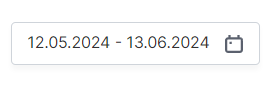

Y despues darle al boton descargar. 

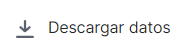

NOTA: NO ME HAGO RESPONSABLE POR DECISIONES FINANCIERAS TOMADAS AL FINALIZAR DE LEER DICHO ARCHIVO.